In [17]:
# Crop Prediction Feature Selection
# Find the most important soil feature (N, P, K, pH) to predict the crop

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt       

In [3]:
crops = pd.read_csv("soil_measures.csv")  
print("Columns in the dataset:", crops.columns.tolist())

Columns in the dataset: ['N', 'P', 'K', 'ph', 'crop']


In [11]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [12]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [13]:
crops.isnull().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [4]:
intended_features = ["N", "P", "K", "pH", "ph"]  
features = [f for f in intended_features if f in crops.columns]
print("Using features:", features)  

Using features: ['N', 'P', 'K', 'ph']


In [15]:
print("Shape of the dataset:", crops.shape)

Shape of the dataset: (2200, 5)


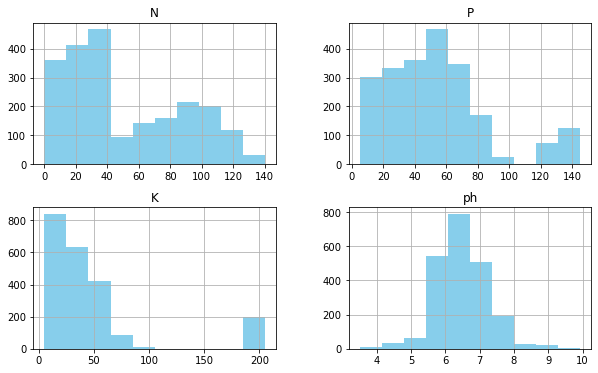

In [16]:
crops[features].hist(figsize=(10,6), color='skyblue')
plt.show()

In [ ]:
# Features have different ranges: N, P, K are large, pH is small
# K is highly skewed .. N and P have some outliers
# StandardScaler is applied to all numerical features (N, P, K, ph)
# The target crop is categorical and not scaled

In [ ]:
scaler = StandardScaler()
crops_scaled = crops.copy()
crops_scaled[features] = scaler.fit_transform(crops[features])

In [21]:
# Feature Selection for each feature after Scaling 
target = "crop"
feature_scores = {}

for feature in features:
    X = crops_scaled[[feature]]  
    y = crops_scaled[target] if target in crops_scaled.columns else crops[target]

    # Split data into training 80% and testing 20%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    feature_scores[feature] = score

In [22]:
print("Feature scores after scaling:", feature_scores)

best_feature = max(feature_scores, key=feature_scores.get)
best_predictive_feature = {best_feature: feature_scores[best_feature]}
print("Best predictive feature after scaling:", best_predictive_feature)

Feature scores after scaling: {'N': 0.15, 'P': 0.16590909090909092, 'K': 0.24545454545454545, 'ph': 0.09772727272727273}
Best predictive feature after scaling: {'K': 0.24545454545454545}


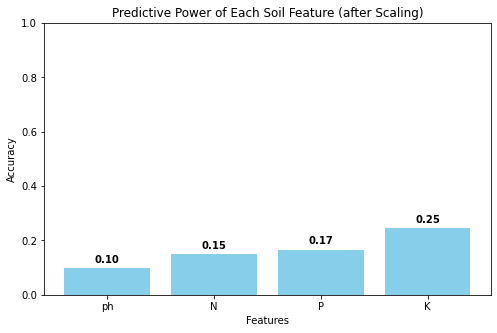

In [23]:
sorted_features = dict(sorted(feature_scores.items(), key=lambda item: item[1]))

plt.figure(figsize=(8,5))
plt.bar(sorted_features.keys(), sorted_features.values(), color='skyblue')
plt.xlabel("Features")
plt.ylabel("Accuracy")
plt.title("Predictive Power of Each Soil Feature (after Scaling)")
plt.ylim(0, 1)
for i, v in enumerate(sorted_features.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

In [ ]:
# Tested each feature separately with Logistic Regression
# The best feature for predicting crop  K 
# This achieves the goal of Feature Selection: identifying the most influential feature